In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np

In [2]:
uselog = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Data/use_log.csv')
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Data/customer_join.csv')

#### **1) 클러스터링 갯수**

In [3]:
customer_clustering = customer[['mean','median','max','min','membership_period']]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

In [5]:
customer_clustering.shape

(4192, 5)

In [6]:
# 최적의 k값 찾기 
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
from sklearn.cluster import KMeans

def elbow(X,num):
  sse = []
  for i in range(1,num+1):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(X)
    sse.append(km.inertia_)  # k-means 클러스터링으로 계산된 SSE 값
  
  plt.plot(range(1,num+1),sse,marker='o')
  plt.xlabel('클러스터 개수')
  plt.ylabel('SSE')
  plt.show()

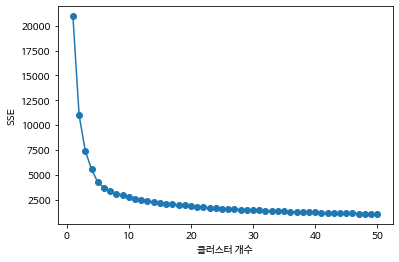

In [7]:
elbow(customer_clustering_sc,50) 

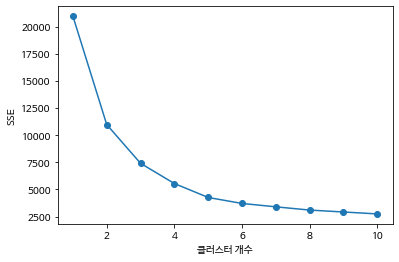

In [8]:
elbow(customer_clustering_sc,10) 

In [9]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

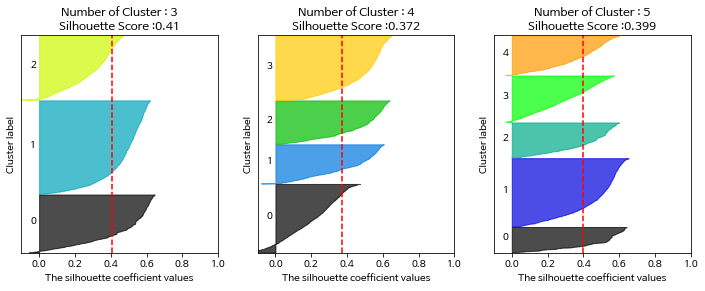

In [10]:
visualize_silhouette([3,4,5],customer_clustering_sc)

In [11]:
# k = 3 
kmeans = KMeans(n_clusters=3,random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[1 2 0]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [12]:
customer_clustering.columns = ['월평균값','월중앙값','월최댓값','월최솟값','회원기간','cluster']
customer_clustering.groupby('cluster').count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1125,1125,1125,1125,1125
1,1823,1823,1823,1823,1823
2,1244,1244,1244,1244,1244


In [13]:
customer_clustering.groupby('cluster').mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,7.676584,7.640000,9.903111,5.550222,8.673778
1,5.009976,5.007954,7.650576,2.394953,32.374657
2,3.687399,3.445338,6.197749,1.719453,8.185691


#### **2) 표준화 방법**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [15]:
customer_clustering = customer[['mean','median','max','min','membership_period']]
def scaler_test(scaler):
  customer_clustering_sc = scaler.fit_transform(customer_clustering)
  kmeans = KMeans(n_clusters=4,random_state=0)
  clusters = kmeans.fit(customer_clustering_sc)
  customer_clustering['cluster'] = clusters.labels_
  customer_clustering.columns = ['월평균값','월중앙값','월최댓값','월최솟값','회원기간','cluster']
  print(customer_clustering.groupby('cluster').mean())

In [16]:
# standardscaler
scaler = StandardScaler()
scaler_test(scaler)

             월평균값      월중앙값       월최댓값      월최솟값       회원기간
cluster                                                    
0        5.524239  5.375187   8.745877  2.687406  14.843328
1        3.054713  2.888598   4.756225  1.653997   9.263434
2        8.054608  8.039598  10.009456  6.160757   7.072104
3        4.677494  4.671337   7.232986  2.153723  36.915933


In [17]:
# minmaxscaler
scaler = MinMaxScaler()
scaler_test(scaler)

             월평균값      월중앙값       월최댓값      월최솟값       회원기간
cluster                                                    
0        3.054713  2.888598   4.756225  1.653997   9.263434
1        4.677494  4.671337   7.232986  2.153723  36.915933
2        8.054608  8.039598  10.009456  6.160757   7.072104
3        5.524239  5.375187   8.745877  2.687406  14.843328


In [18]:
# roubustscaler
scaler = RobustScaler()
scaler_test(scaler)

             월평균값      월중앙값       월최댓값      월최솟값       회원기간
cluster                                                    
0        4.554548  4.484715   7.211957  2.045516  32.606658
1        8.058966  8.039881  10.014286  6.183333   7.045238
2        5.534528  5.387892   8.751868  2.691330  14.824365
3        2.725913  2.668819   3.800738  1.739852   9.612546


In [19]:
#maxabsscaler
scaler = MaxAbsScaler()
scaler_test(scaler)

             월평균값      월중앙값       월최댓값      월최솟값       회원기간
cluster                                                    
0        2.725913  2.668819   3.800738  1.739852   9.612546
1        4.554585  4.484704   7.212780  2.044867  32.628144
2        5.534528  5.387892   8.751868  2.691330  14.824365
3        8.054734  8.035672  10.009512  6.179548   7.038050


#### **3) PCA 변수 파악**

In [20]:
# 예제 코드와 동일하게 다시 클러스터링 진행
customer_clustering = customer[['mean','median','max','min','membership_period']]

sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4,random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering['cluster'] = clusters.labels_

In [21]:
# pca 진행 
from sklearn.decomposition import PCA
x = customer_clustering_sc
pca = PCA(n_components=2)
pca_res = pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']

In [22]:
pca.explained_variance_ratio_

array([0.69042666, 0.18937526])

In [23]:
sum(pca.explained_variance_ratio_) 

0.8798019226140572

In [24]:
principalDF = pd.DataFrame(pca.components_)
principalDF = np.transpose(principalDF)
principalDF.columns = ['PC1','PC2']
principalDF.rename(index={0:'월평균값',1:'월중앙값',2:'월최댓값',3:'월최솟값',4:'회원기간'},inplace=True)
principalDF

,PC1,PC2
월평균값,0.532650,-0.109719
월중앙값,0.513845,-0.149198
월최댓값,0.441831,-0.236745
월최솟값,0.470014,0.127829
회원기간,-0.190050,-0.945153


#### **4) 클러스터링 변수 변경**

In [25]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [26]:
clustering = customer[['class','gender','campaign_id','mean','max','min','routine_flg','membership_period']]
clustering.head()

,class,gender,campaign_id,mean,max,min,routine_flg,membership_period
0,C01,F,CA1,4.833333,8,2,1,47
1,C01,M,CA1,5.083333,7,3,1,47
2,C01,M,CA1,4.583333,6,3,1,47
3,C01,F,CA1,4.833333,7,2,1,47
4,C03,F,CA1,3.916667,6,1,1,47


In [27]:
clustering['class'].unique()

array(['C01', 'C03', 'C02'], dtype=object)

In [28]:
clustering['campaign_id'].unique()

array(['CA1', 'CA2', 'CA3'], dtype=object)

In [29]:
clustering['class'] =  clustering['class'].str.slice(2)
clustering['class'].unique()

array(['1', '3', '2'], dtype=object)

In [30]:
clustering['campaign_id'] =  clustering['campaign_id'].str.slice(2)
clustering['campaign_id'].unique()

array(['1', '2', '3'], dtype=object)

In [31]:
clustering.head()

,class,gender,campaign_id,mean,max,min,routine_flg,membership_period
0,1,F,1,4.833333,8,2,1,47
1,1,M,1,5.083333,7,3,1,47
2,1,M,1,4.583333,6,3,1,47
3,1,F,1,4.833333,7,2,1,47
4,3,F,1,3.916667,6,1,1,47


In [32]:
clustering['routine_flg'].unique()

array([1, 0])

In [33]:
clustering['membership_period'].unique()

array([47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 23, 35, 34, 33, 21,
       22, 32, 20, 31, 19, 18, 30, 29, 17, 28, 16, 27, 15, 26, 25, 13, 24,
       12, 11, 10, 14,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [34]:
map_gender = {'M':0,'F':1}
col = ['gender']
clustering[col] = clustering[col].applymap(map_gender.get)
clustering.head()

,class,gender,campaign_id,mean,max,min,routine_flg,membership_period
0,1,1,1,4.833333,8,2,1,47
1,1,0,1,5.083333,7,3,1,47
2,1,0,1,4.583333,6,3,1,47
3,1,1,1,4.833333,7,2,1,47
4,3,1,1,3.916667,6,1,1,47


In [35]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              4192 non-null   object 
 1   gender             4192 non-null   int64  
 2   campaign_id        4192 non-null   object 
 3   mean               4192 non-null   float64
 4   max                4192 non-null   int64  
 5   min                4192 non-null   int64  
 6   routine_flg        4192 non-null   int64  
 7   membership_period  4192 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 262.1+ KB


In [36]:
clustering = clustering.astype({'class':'int','campaign_id':'int'})
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              4192 non-null   int64  
 1   gender             4192 non-null   int64  
 2   campaign_id        4192 non-null   int64  
 3   mean               4192 non-null   float64
 4   max                4192 non-null   int64  
 5   min                4192 non-null   int64  
 6   routine_flg        4192 non-null   int64  
 7   membership_period  4192 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 262.1 KB


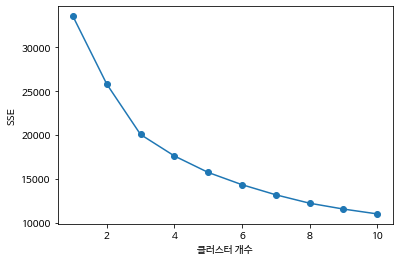

In [37]:
sc = StandardScaler()
clustering_sc = sc.fit_transform(clustering)
elbow(clustering_sc,10)

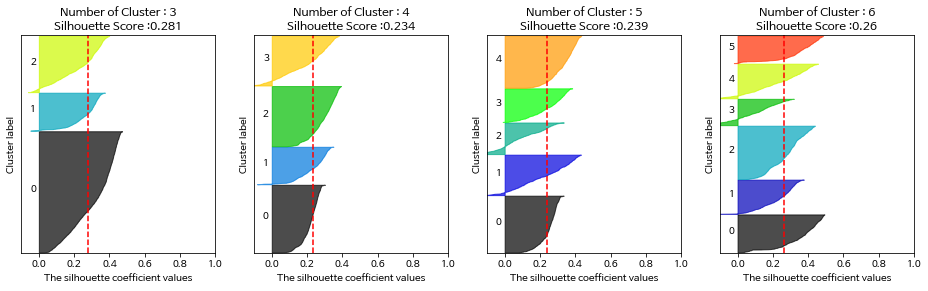

In [38]:
visualize_silhouette([3,4,5,6],clustering_sc)

In [48]:
# 본래 클러스터링 보다 실루엣 계수 낮음
# k = 3 
kmeans = KMeans(n_clusters=3,random_state=0)
clusters = kmeans.fit(clustering_sc)
clustering['cluster'] = clusters.labels_
clustering.groupby('cluster').mean()

,class,gender,campaign_id,mean,max,min,routine_flg,membership_period
cluster,,,,,,,,
0,1.754773,0.473483,1.224862,4.831381,7.578702,2.232923,1.000000,27.284684
1,1.786486,0.483784,1.655405,3.443704,5.495946,1.821622,0.027027,7.178378
2,1.834703,0.464840,1.565297,7.690012,9.925114,5.605479,0.946119,8.527854
